In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Total Speeches

In [27]:
fp = 'cleaned_speeches.csv'
df = pd.read_csv(fp)
df['chars'] = df['speech'].str.len()
df['words'] = df['speech'].str.split().apply(len)
df['unique_words'] = df['speech'].str.split().apply(set).apply(len)
df['date'] =  pd.to_datetime(df['date'])
df

,Unnamed: 0,president,date,title,speech,chars,words,unique_words
0,0,Manuel L. Quezon,1935-11-25,Message to the First Assembly on National Defense,message of his excellency manuel l. quezon ...,27387,4370,1532
1,1,Manuel L. Quezon,1936-06-16,On the Country’s Conditions and Problems,message of his excellency manuel l. quezon ...,44098,7282,2011
2,2,Manuel L. Quezon,1937-10-18,"Improvement of Philippine Conditions, Philippi...",message of his excellency manuel l. quezon ...,35166,5822,1704
3,3,Manuel L. Quezon,1938-01-24,Revision of the System of Taxation,message of his excellency manuel l. quezon ...,17470,2939,952
4,4,Manuel L. Quezon,1939-01-24,The State of the Nation and Important Economic...,message of his excellency manuel l. quezon ...,30143,4867,1557
5,5,Manuel L. Quezon,1940-01-22,The State of the Nation,message of his excellency manuel l. quezon ...,36323,5872,1844
6,6,Manuel L. Quezon,1941-01-31,The State of the Nation,message of his excellency manuel l. quezon ...,64159,10011,2757
7,0,Sergio Osmeña,1945-06-09,Message to the First Congress of the Commonwea...,message of his excellency sergio osmeña pre...,27540,4567,1505
8,0,Manuel Roxas,1946-06-03,The State of the Nation,message of his excellency manuel roxas pres...,70056,11525,2862
9,1,Manuel Roxas,1947-01-27,Message on the State of the Nation,message of his excellency manuel roxas pres...,78253,12685,3139


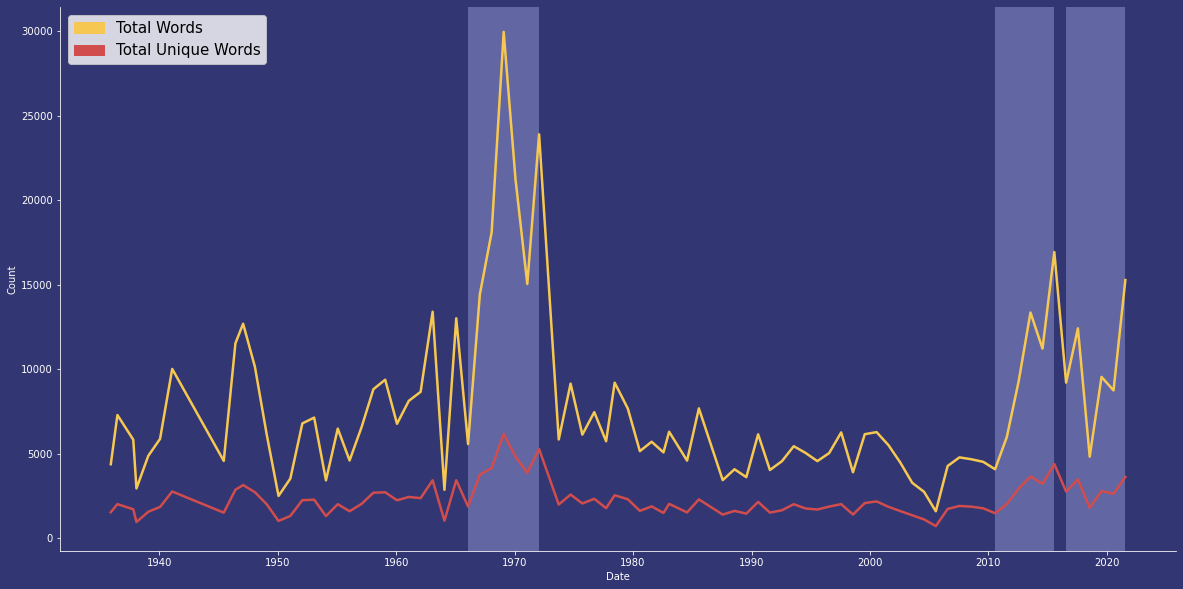

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="date", y="words", color='#f6c851', linewidth=2.5)
sns.lineplot(data=df, x="date", y="unique_words", color='#d14d4d', linewidth=2.5)
fig = plt.gcf()
fig.patch.set_facecolor('#323672')
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#323672')
patch1 = mpatches.Patch(color='#f6c851', label='Total Words')
patch2 = mpatches.Patch(color='#d14d4d', label='Total Unique Words')
plt.legend(handles=[patch1, patch2], fontsize=15)
plt.axvspan('1966-01-24', '1972-01-24', color='#686ca8', alpha=0.9, lw=0)
plt.axvspan('2010-07-26', '2015-07-27', color='#686ca8', alpha=0.9, lw=0)
plt.axvspan('2016-07-25', '2021-07-26', color='#686ca8', alpha=0.9, lw=0);

# Word Clouds Per President

In [4]:
newStopWords = ['ha','wa', 'u', 'applause', 
                "ng","sa","na","mga","ang","ay","at","isang","ito",
                "ni","may","bilang","si","hindi","noong","mula",
                "para","kung","nito","pang","tao","pag","upang",
                "kanyang","siya","iba","rin","ibang","kanilang",
                "dahil","pa","lamang","isa","din","maaaring","nasa",
                "niya","nang","pamamagitan","kay","hanggang","ilang",
                "akin","aking","ako","alin","am","amin","aming","ang",
                "ano","anumang","apat","at","atin","ating","ay",
                "bababa","bago","bakit","bawat","bilang","dahil",
                "dalawa","dapat","din","dito","doon","gagawin",
                "gayunman","ginagawa","ginawa","ginawang","gumawa",
                "gusto","habang","hanggang","hindi","huwag","iba",
                "ibaba","ibabaw","ibig","ikaw","ilagay","ilalim",
                "ilan","inyong","isa","isang","itaas","ito","iyo",
                "iyon","iyong","ka","kahit","kailangan","kailanman",
                "kami","kanila","kanilang","kanino","kanya","kanyang",
                "kapag","kapwa","karamihan","katiyakan","katulad",
                "kaya","kaysa","ko","kong","kulang","kumuha","kung",
                "laban","lahat","lamang","likod","lima","maaari",
                "maaaring","maging","mahusay","makita","marami",
                "marapat","masyado","may","mayroon","mga","minsan",
                "mismo","mula","muli","na","nabanggit","naging",
                "nagkaroon","nais","nakita","namin","napaka","narito",
                "nasaan","ng","ngayon","ni","nila","nilang","nito",
                "niya","niyang","noon","o","pa","paano","pababa",
                "paggawa","pagitan","pagkakaroon","pagkatapos",
                "palabas","pamamagitan","panahon","pangalawa","para",
                "paraan","pareho","pataas","pero","pumunta",
                "pumupunta","sa","saan","sabi","sabihin","sarili",
                "sila","sino","siya","tatlo","tayo","tulad",
                "tungkol","una","wala", "walang",
                'www','youtube','com','http', 'translated', 'transcript']

my_stop_words = text.ENGLISH_STOP_WORDS.union(newStopWords)

In [26]:
df_cloud = df.drop('Unnamed: 0', axis=1)
df_cloud

def tfidf_pres(df):
    '''Creates a Dataframe of all TFIDF scores of all presidents'''
    df_tfidf = pd.DataFrame()

    for i, pres in enumerate(df_cloud['president'].unique()):
        speech = df_cloud[df_cloud['president'] == pres]['speech']
        tfidfvec = TfidfVectorizer(stop_words=my_stop_words,
                                   token_pattern=u'(?ui)\\b[a-z]+\\b',
                                   ngram_range=(2,2))
        tfidf_tokenized = tfidfvec.fit_transform(speech)
        feature_array = tfidfvec.get_feature_names()
        sums = np.ravel(tfidf_tokenized.sum(axis=0))
        
        df_score = pd.DataFrame({'feature'+str(i): feature_array,
                                 'score'+str(i): sums})
        df_tfidf = pd.concat([df_tfidf, df_score], axis=1)
    return df_tfidf

df_tfidf

,feature0,score0,feature1,score1,feature2,score2,feature3,score3,feature4,score4,feature5,score5,feature6,score6,feature7,score7,feature8,score8,feature9,score9,feature10,score10,feature11,score11,feature12,score12,feature13,score13
0,abaca copra,0.013508,abandonment attitude,0.01734,abaca cent,0.010708,abaca fibers,0.016162,abaca eradicate,0.025288,abaca coconut,0.025403,abatement depressing,0.011278,aabot bilyon,0.016912,abadia pnp,0.024216,abandoned lawsuits,0.020194,abdication effect,0.017579,abandon jobs,0.025508,abad makes,0.011548,abandon problem,0.011937
1,abaca fibers,0.013508,abides hour,0.01734,abaca commodities,0.010708,abaca industry,0.017795,abandon practice,0.025288,abaca export,0.014129,abide implement,0.011278,aabot pinakamababa,0.016912,abandon hatred,0.017875,abat administrator,0.018183,ability compete,0.017579,abandoned leaders,0.018089,abad received,0.011548,abdul khayr,0.015782
2,abaca free,0.020441,able achieve,0.01734,abaca copra,0.010708,abaca land,0.016162,abandon present,0.016702,abaca industry,0.015189,abides decisions,0.011278,aapat porsiento,0.016912,abet slide,0.022851,abiding citizens,0.021704,ability cope,0.017579,abated story,0.037311,abaya department,0.014076,abiding citizens,0.011937
3,abandon idea,0.019055,able provide,0.01734,abaca fibers,0.018437,abaca mosaic,0.016162,abetted foreign,0.016702,abaca production,0.015189,abiding faith,0.011561,abaca chips,0.007537,abiding faith,0.017875,abilities confidence,0.018183,ability outweigh,0.023655,abaya officers,0.025508,abaya waver,0.011548,abiding countrymen,0.015934
4,abandon legaspi,0.016397,able short,0.01734,abaca industries,0.010708,abaca project,0.016162,ability participate,0.016702,abandon masses,0.014129,abilities according,0.028189,abaca cited,0.009954,ability earn,0.017875,abilities referring,0.020194,able reach,0.017579,abdicate responsibility,0.020356,abby helped,0.011548,ability drive,0.011937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zones foreign,0.007537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zones forest,0.008568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zones parts,0.018449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zones ports,0.009360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save file to csv
# df_tfidf.to_csv('tfidf_president.csv')